# HEART DISEASE ANALYSIS:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Heart Disease data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df['sex'].nunique()

2

In [10]:
df['cp'].nunique()

4

In [11]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [12]:
df['fbs'].nunique()

2

In [13]:
df['restecg'].nunique()

3

In [14]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [15]:
df['exang'].nunique()

2

In [16]:
df['slope'].nunique()

3

In [17]:
df['ca'].nunique()

5

In [18]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [19]:
df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [20]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

__1 --> Defective Heart__

__0 --> Healthy Heart__

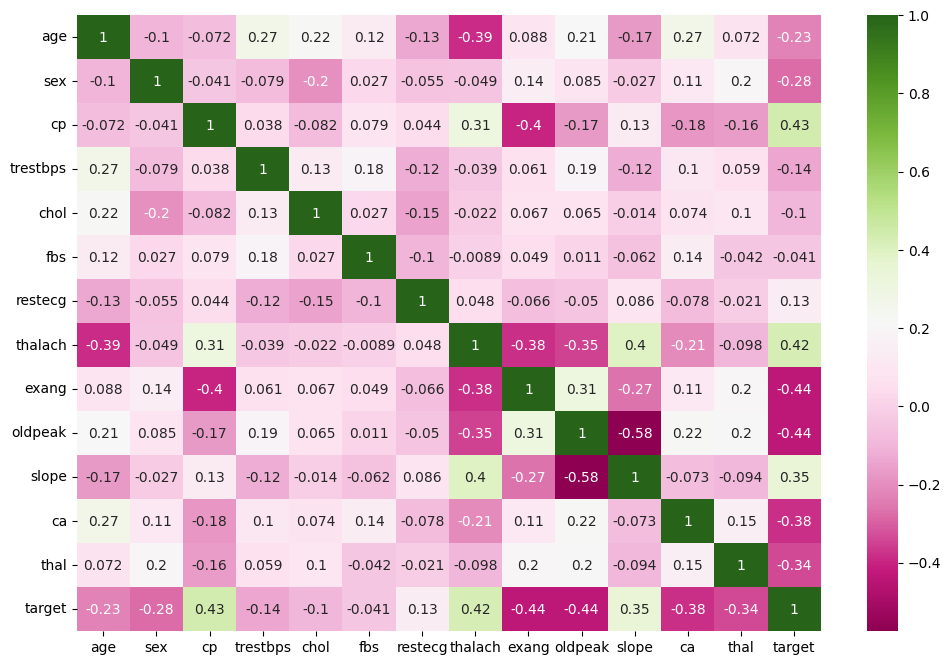

In [21]:
plt.figure(figsize =(12,8))
sns.heatmap(df.corr(), cmap='PiYG', annot=True)
plt.show()

# Train and Test Split:

In [22]:
X = df.drop(columns = ['target'], axis=1)
y = df['target']

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [24]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [26]:
X.shape, X_train.shape, X_test.shape

((1025, 13), (820, 13), (205, 13))

In [27]:
y.shape, y_train.shape, y_test.shape

((1025,), (820,), (205,))

# Model Training:

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation:

In [31]:
prediction = model.predict(X_train)

In [32]:
accuracy = accuracy_score(prediction, y_train)

In [33]:
accuracy

0.8524390243902439

In [34]:
prediction1 = model.predict(X_test)
accuracy1 = accuracy_score(prediction1, y_test)

In [35]:
accuracy1

0.8048780487804879

# Predictive System:

In [36]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

input_numpy = np.asarray(input_data)
input_reshape = input_numpy.reshape(1,-1)

prediction = model.predict(input_reshape)

if (prediction[0] == 0):
    print('HEALTHY HEART')
else:
    print('DEFECTIVE HEART')
    
prediction

DEFECTIVE HEART


array([1], dtype=int64)

In [37]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

input_numpy = np.asarray(input_data)
input_reshape = input_numpy.reshape(1,-1)

prediction = model.predict(input_reshape)

if (prediction[0] == 0):
    print('HEALTHY HEART')
else:
    print('DEFECTIVE HEART')
    
prediction

HEALTHY HEART


array([0], dtype=int64)

In [38]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))